In [94]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
def f(x):
    return x**2

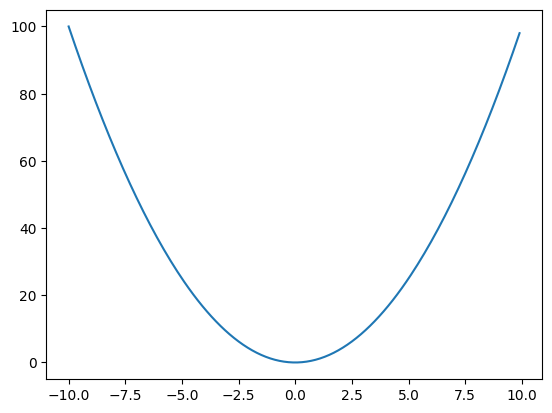

In [96]:
xs = np.arange(-10, 10, 0.1)
ys=f(xs)
plt.plot(xs, ys)
plt.show()

In [97]:
class Value:
    def __init__(self,data, _children = (), _op='', label=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return "data ="+str(self.data)

    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')

        def _backward():
          self.grad += 1.0*out.grad
          other.grad += 1.0*out.grad
        out._backward = _backward
        return out


    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')

        def _backward():
          self.grad += other.data*out.grad
          other.grad += self.data*out.grad
        out._backward = _backward
        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, _children=(self,), _op='tanh', label=f"tanh({self.label})")

        def _backward():
          self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out


    def backward(self):
      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
      build_topo(self)
      self.grad = 1.0
      for node in reversed(topo):
        node._backward()


a=Value(2.0, label= 'a')
b=Value(-3.0, label = 'b')
c=Value(10.0, label = 'c')
d=a*b ;d.label = 'd'
e = d+c;e.label= 'e'
f=Value(2.0, label = 'f')
L = e*f;L.label = 'L'


In [98]:
d._prev

d._op

'*'

In [99]:
from graphviz import Digraph


def trace( root):
# builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add ( v )
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'randkir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular record') node for it
        dot.node(name = uid, label = "{%s | data = %.4f | grad %.f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
        # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
# and connect this node to it
            dot.edge(uid + n._op, uid)
    for nl, n2 in edges:
# connect nI to the op node Of n2
        dot.edge(str(id(nl)), str(id(n2)) + n2._op)
    return dot

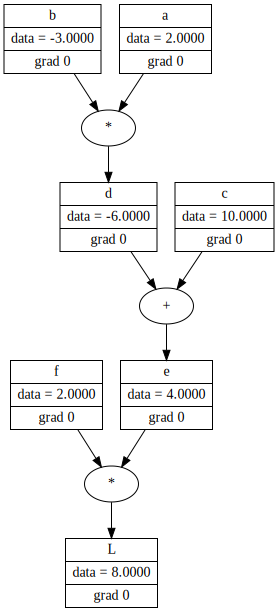

In [100]:
draw_dot(L)

In [101]:
def lol():
  h = 0.001

  a=Value(2.0, label= 'a')
  b=Value(-3.0, label = 'b')
  c=Value(10.0, label = 'c')
  d=a*b ;d.label = 'd'
  e = d+c;e.label= 'e'
  f=Value(2.0, label = 'f')
  L = e*f;L.label = 'L'
  L1=L.data

  a=Value(2.0, label= 'a')
  b=Value(-3.0, label = 'b')
  c=Value(10.0, label = 'c')
  d=a*b ;d.label = 'd'
  e = d+c;e.label= 'e'
  f=Value(2.0, label = 'f')
  L = e*f;L.label = 'L'
  L2=L.data
  print((L2-L1)/h)
lol()

0.0


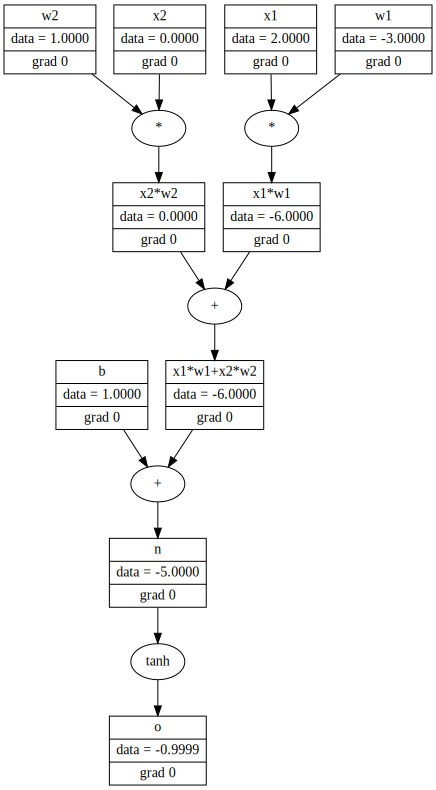

In [102]:
x1 = Value(2, label='x1')
x2 = Value(0, label='x2')
w1 = Value(-3, label='w1')
w2 = Value(1, label='w2')
b = Value(1.0, label='b')
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)


In [103]:
o._backward()

In [104]:
n._backward()

In [105]:
b._backward()

In [106]:
x1w1x2w2._backward()

In [107]:
x1w1._backward()
x2w2._backward()

In [108]:
x1.grad = w1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad

In [109]:
w1.grad = x1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad

In [110]:
o.grad=1.0
n.grad = 0.5
x1w1x2w2.grad = 1.0
x1w1.grad = 1.0
x2w2.grad = 1.0
x2.grad = 1.0
x1.grad = 1.0
b.grad = 1.0

In [112]:
o.backward()

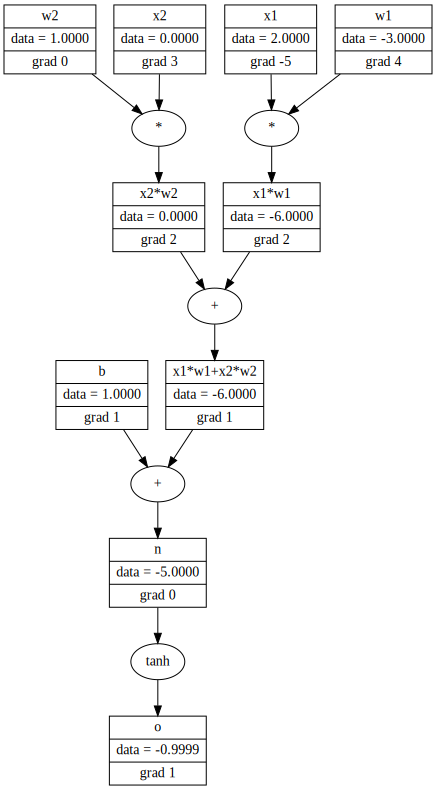

In [113]:
draw_dot(o)